# PREFACE

    ===============================================================================================================
    Graded Challenge 3

    Nama  : Harun
    Batch : RMT - 35

    Tugas program kali ini bertujuan untuk pengambilan data dari internet, persiapan data, analisis statistik, dan pemahaman bisnis.
    
    ===============================================================================================================

# Libraries

In [1]:
import pandas as pd 
from selenium import webdriver 
from bs4 import BeautifulSoup
from time import sleep
import requests
from scipy import stats
import numpy as np
import seaborn as sns

# Web Scraping

In [695]:
# Inisiasi dataframe kosong untuk menampung hasil scraping
data = pd.DataFrame()
# List kosong untuk menampung hasil scraping setiap value
nama_produk = []
harga_produk = []
nama_toko = []
kota_toko = []
banyaknya_terjual = []
rating = []

# Instance driver
driver = webdriver.Chrome()

for i in range(1, 15):
    # Tunjukin akan ngambil data dari link mana
    url = "https://www.tokopedia.com/search?page={}&q=seblak&search_id=202408230011197B9C09C920D16A129YHT&source=universe&srp_component_id=02.07.01.01&st=product".format(i)
    # Nyuruh driver untuk akses tautannya
    driver.get(url)
    sleep(5)  # Waktu tunggu agar halaman terload sepenuhnya

    # Loop untuk scroll ke bawah beberapa kali
    for scroll in range(15):
        driver.execute_script("window.scrollBy(0, 350)")  # Sekali scroll 350 pixel
        sleep(1)  # Menunggu 1 detik sebelum iterasi selanjutnya

    # Setelah scrolling, ambil source page untuk di-parse oleh BeautifulSoup
    html = driver.page_source
    soup = BeautifulSoup(html, "html.parser")

    # Nama produk
    for item in soup.find_all('div', {"class": "css-5wh65g"}):
        elemen1 = item.find('div', {"class": "VKNwBTYQmj8+cxNrCQBD6g=="})
        nama_produk.append(elemen1.get_text().strip() if elemen1 else None)

    # Harga produk
    for item in soup.find_all('div', {"class": "css-5wh65g"}):
        elemen1 = item.find('div', {"class": "ELhJqP-Bfiud3i5eBR8NWg=="})
        harga_produk.append(elemen1.get_text().strip() if elemen1 else None)

    # Nama toko
    for item in soup.find_all('div', {"class": "css-5wh65g"}):
        elemen1 = item.find('span', {"class": "X6c-fdwuofj6zGvLKVUaNQ== -9tiTbQgmU1vCjykywQqvA== flip"})
        nama_toko.append(elemen1.get_text().strip() if elemen1 else None)

    # Kota toko
    for item in soup.find_all('div', {"class": "css-5wh65g"}):
        elemen1 = item.find('span', {"class": "-9tiTbQgmU1vCjykywQqvA== flip"})
        kota_toko.append(elemen1.get_text().strip() if elemen1 else None)

    # Banyaknya terjual
    for item in soup.find_all('div', {"class": "css-5wh65g"}):
        sold = item.find('span', {"class": "eLOomHl6J3IWAcdRU8M08A=="})
        banyaknya_terjual.append(sold.get_text().strip() if sold else None)

    # Rating
    for item in soup.find_all('div', {"class": "css-5wh65g"}):
        rating_elem = item.find('span', {"class": "nBBbPk9MrELbIUbobepKbQ=="})
        rating.append(rating_elem.get_text().strip() if rating_elem else None)

# Hentikan driver setelah selesai
driver.quit()

# Membuat dataframe dari hasil scraping
data = pd.DataFrame({
    'Nama Produk': nama_produk,
    'Harga Produk': harga_produk,
    'Nama Toko': nama_toko,
    'Kota Toko': kota_toko,
    'Banyaknya Terjual': banyaknya_terjual,
    'Rating': rating
})

# Tampilkan beberapa data hasil scraping
data.head()

In [696]:
#mengecek missing value
data.isnull().sum()

hasil scrapingan sukses. nah disini kita melihat adanya missing value yang dimana kolom banyaknya terjual dan rating masih ada yang kosong. langkah selanjutnya kita melakukan proses cleaning data. sebelumnya kita export dulu hasil data yang sudah di scraping ke dalam file csv.


In [697]:
#menampilkan data yang sudah di scraping
data

hasil scrapingan yang kita masukkan ke dataframe.

In [698]:
#export data ke csv
data.to_csv("hasil_scraping.csv")

# Data Preparation

## Eksplorasi Data

In [706]:
import pandas as pd
# load data hasil scrapingan
data = pd.read_csv('hasil_scraping.csv')
# menampilkan data
data

,Nama Produk,Harga Produk,Nama Toko,Kota Toko,Banyaknya Terjual,Rating
0,Seblak Instan Ceu Nthien Khas Bandung Rasana N...,Rp17.000,Central Seblak Nusantara,Tangerang Selatan,2rb+ terjual,4.9
1,KRUPUK SEBLAK RAFAEL | SEBRING | KERUPUK MAWAR...,Rp21.630,Toko kue Sumber Mas,Jakarta Timur,40+ terjual,5.0
2,"Seblak Rafael, Seblak Coet Instan Halal",Rp25.000,Brother Meat Shop,Depok,500+ terjual,5.0
3,SEBLAK KERING PEDAS DAUN JERUK - 500 gram,Rp17.500,BociKakang,Jakarta Selatan,1rb+ terjual,4.6
4,Seblak Rafael/Seblak Coet Instan Halal,Rp26.600Rp28.000,Foodstocks,Jakarta Selatan,500+ terjual,4.9
...,...,...,...,...,...,...
1166,Kerupuk Rambak Sapi Seven Snack,Rp15.000,Pisang Goreng Madu Bu Nanik,Jakarta Barat,1rb+ terjual,4.9
1167,Kerupuk Keriting Palembang,Rp28.000,Pisang Goreng Madu Bu Nanik,Jakarta Barat,1rb+ terjual,4.9
1168,Batagor Kering Sari Roso,Rp26.000,Pisang Goreng Madu Bu Nanik,Jakarta Barat,100+ terjual,4.7
1169,Stick / stik otak-otak Bu Nanik,Rp10.000,Pisang Goreng Madu Bu Nanik,Jakarta Barat,750+ terjual,4.7


data.describe(include="all").T

In [707]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Nama Produk,1171,937,Kylafood Seblak Rempah Autentik,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Harga Produk,1171,427,Rp5.000,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Nama Toko,1171,449,kylafood,78,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kota Toko,1171,74,Bandung,168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Banyaknya Terjual,1116,48,100+ terjual,188,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,1055.0,NaN,NaN,NaN,4.871469,0.169806,3.4,4.8,4.9,5.0,5.0


disini kita melihat adanya missing value menunjukkan bahwa ada nilai hilang dalam data.

In [708]:
data.isna().sum()

Nama Produk            0
Harga Produk           0
Nama Toko              0
Kota Toko              0
Banyaknya Terjual     55
Rating               116
dtype: int64

Tipe datanya string semua, seharusnya ada yang berupa float pada kolom harga produk, banyaknya terjual, dan rating

In [709]:
# cek data duplicat
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1166     True
1167     True
1168     True
1169     True
1170     True
Length: 1171, dtype: bool

Tidak ada data duplikat

## Data cleaning

setelah kita mengetahui data apa saja yang harus dibersihkan dengan melihat data eksplorasi tadi selanjutnya kita akan melakukan proses pembersihan data.

In [710]:
# cek tipe data
data.dtypes

Nama Produk           object
Harga Produk          object
Nama Toko             object
Kota Toko             object
Banyaknya Terjual     object
Rating               float64
dtype: object

tipe datanya harus diganti harga produk dan banyaknya terjual ke tipe data float

In [711]:
data['Harga Produk']

0               Rp17.000
1               Rp21.630
2               Rp25.000
3               Rp17.500
4       Rp26.600Rp28.000
              ...       
1166            Rp15.000
1167            Rp28.000
1168            Rp26.000
1169            Rp10.000
1170            Rp17.000
Name: Harga Produk, Length: 1171, dtype: object

In [712]:
# Pisahkan jika ada dua harga yang digabung
# Menghapus titik dan mengubah tipe data menjadi float
data["Harga Produk"] = data['Harga Produk'].str.split('Rp').str[1].str.replace(".","").apply(pd.to_numeric, errors='coerce')
data.head()

,Nama Produk,Harga Produk,Nama Toko,Kota Toko,Banyaknya Terjual,Rating
0,Seblak Instan Ceu Nthien Khas Bandung Rasana N...,17000,Central Seblak Nusantara,Tangerang Selatan,2rb+ terjual,4.9
1,KRUPUK SEBLAK RAFAEL | SEBRING | KERUPUK MAWAR...,21630,Toko kue Sumber Mas,Jakarta Timur,40+ terjual,5.0
2,"Seblak Rafael, Seblak Coet Instan Halal",25000,Brother Meat Shop,Depok,500+ terjual,5.0
3,SEBLAK KERING PEDAS DAUN JERUK - 500 gram,17500,BociKakang,Jakarta Selatan,1rb+ terjual,4.6
4,Seblak Rafael/Seblak Coet Instan Halal,26600,Foodstocks,Jakarta Selatan,500+ terjual,4.9


Isi dari harga produk tidak ada lagi yang double dan sudah diganti tipe datanya kedalam float

In [713]:
# Hapus kata "Terjual" dan tanda "+"
data['Banyaknya Terjual'] = data['Banyaknya Terjual'].str.replace('terjual', '').str.replace('+', '')

# Ganti "rb" dengan "000" untuk mengkonversi ke ribuan
data['Banyaknya Terjual'] = data['Banyaknya Terjual'].str.replace('rb', '000')

# Ubah string menjadi tipe data numerik
data['Banyaknya Terjual'] = pd.to_numeric(data['Banyaknya Terjual'])
data.head()

,Nama Produk,Harga Produk,Nama Toko,Kota Toko,Banyaknya Terjual,Rating
0,Seblak Instan Ceu Nthien Khas Bandung Rasana N...,17000,Central Seblak Nusantara,Tangerang Selatan,2000.0,4.9
1,KRUPUK SEBLAK RAFAEL | SEBRING | KERUPUK MAWAR...,21630,Toko kue Sumber Mas,Jakarta Timur,40.0,5.0
2,"Seblak Rafael, Seblak Coet Instan Halal",25000,Brother Meat Shop,Depok,500.0,5.0
3,SEBLAK KERING PEDAS DAUN JERUK - 500 gram,17500,BociKakang,Jakarta Selatan,1000.0,4.6
4,Seblak Rafael/Seblak Coet Instan Halal,26600,Foodstocks,Jakarta Selatan,500.0,4.9


isi dalam tabel terjual sudah diubah tipe datanya menjadi float dan untuk kata "rb" sudah dikonversi ke ribuan "000", untuk kata terjual dan tanda"+" sudah terhapus Untuk melakukan perhitungan seperti rata-rata, median, atau standar deviasi, data harus berupa numerik.

In [714]:
# cek tipe data
data.dtypes


Nama Produk           object
Harga Produk           int64
Nama Toko             object
Kota Toko             object
Banyaknya Terjual    float64
Rating               float64
dtype: object

Tipe data sudah berubah dan sesuai

Menambahkan kolom baru untuk kolom pendapatan

In [715]:
# menambahkan kolom pendapatan
data["Pendapatan"] = data["Harga Produk"] * data["Banyaknya Terjual"]


membuat kolom pendapatan dengan cara kolom harga produk dikalikan dengan kolom banyaknya terjual.

Dengan adanya kolom pendapatan, kita dapat langsung menghitung total pendapatan yang dihasilkan dari semua produk. agar memudahkan kita untuk menganalisis lebih lanjut.

In [716]:
# menampilkan data
data.head()

,Nama Produk,Harga Produk,Nama Toko,Kota Toko,Banyaknya Terjual,Rating,Pendapatan
0,Seblak Instan Ceu Nthien Khas Bandung Rasana N...,17000,Central Seblak Nusantara,Tangerang Selatan,2000.0,4.9,34000000.0
1,KRUPUK SEBLAK RAFAEL | SEBRING | KERUPUK MAWAR...,21630,Toko kue Sumber Mas,Jakarta Timur,40.0,5.0,865200.0
2,"Seblak Rafael, Seblak Coet Instan Halal",25000,Brother Meat Shop,Depok,500.0,5.0,12500000.0
3,SEBLAK KERING PEDAS DAUN JERUK - 500 gram,17500,BociKakang,Jakarta Selatan,1000.0,4.6,17500000.0
4,Seblak Rafael/Seblak Coet Instan Halal,26600,Foodstocks,Jakarta Selatan,500.0,4.9,13300000.0


data sudah bersih setelah itu kita akan mengeskpornya kembali ke csv

In [717]:
data.to_csv("data_seblak.csv", index=False)

# Business Understanding/Problem Statement

## Metode SMART

<li>Specific /Tujuan : Menentukan apakah produk seblak layak dijual melalui skema dropship di Tokopedia dengan mengukur minat dan performa penjualan produk seblak di platform tersebut.</li>
<li>Measurable /Pengukuran : kombinasi antara web scraping, analisis statistik, potensi pendapatan, dan korelasi</li>
<li>Achievable/Pencapaian : Pengumpulan data melalui web scraping dan analisis statistik dasar yang dapat dilakukan dengan menggunakan Python dan library terkait seperti Pandas, Scipy, dan BeautifulSoup/Scrapy.</li>
<li>Relevant/Relevansi: Hasil analisis ini akan membantu dalam mengambil keputusan apakah seblak merupakan produk yang layak untuk dijual dengan skema dropship, sehingga memaksimalkan modal yang terbatas hanya untuk promosi.</li>
<li>Time-bound/Batasan waktu : Analisis dilakukan berdasarkan data yang diambil dari Tokopedia dalam periode tertentu, misalnya dalam satu bulan terakhir, untuk memahami tren pasar yang sedang berlangsung.</li>


## Problem Statement

Menentukan kelayakan produk seblak untuk dijual melalui skema dropship di Tokopedia dengan mengukur minat pasar dan performa penjualan berdasarkan data terkini.

# Analysis

In [718]:
# menampilkan data yang sudah dibersihkan
data_seblak = pd.read_csv("data_seblak.csv")
data.head()

,Nama Produk,Harga Produk,Nama Toko,Kota Toko,Banyaknya Terjual,Rating,Pendapatan
0,Seblak Instan Ceu Nthien Khas Bandung Rasana N...,17000,Central Seblak Nusantara,Tangerang Selatan,2000.0,4.9,34000000.0
1,KRUPUK SEBLAK RAFAEL | SEBRING | KERUPUK MAWAR...,21630,Toko kue Sumber Mas,Jakarta Timur,40.0,5.0,865200.0
2,"Seblak Rafael, Seblak Coet Instan Halal",25000,Brother Meat Shop,Depok,500.0,5.0,12500000.0
3,SEBLAK KERING PEDAS DAUN JERUK - 500 gram,17500,BociKakang,Jakarta Selatan,1000.0,4.6,17500000.0
4,Seblak Rafael/Seblak Coet Instan Halal,26600,Foodstocks,Jakarta Selatan,500.0,4.9,13300000.0


## Hitung rata-rata, median, standar deviasi, skewness, dan kurtosis dari kolom harga, banyak produk terjual, dan rating.

In [719]:
# Menghitung rata-rata
rata_rata = data_seblak[['Harga Produk', 'Banyaknya Terjual', 'Rating']].mean()
# Menampilkan hasilnya
print("Rata-rata:\n", rata_rata)

Rata-rata:
 Harga Produk         29416.125534
Banyaknya Terjual      429.339606
Rating                   4.871469
dtype: float64


Dari data seblak yang kita miliki, kita memiliki 1170 data produk seblak

Rata-Rata Harga Produk:

Rata-rata harga produk seblak adalah Rp29.416. Harga ini menunjukkan bahwa produk seblak yang dijual di Tokopedia cenderung berada pada kisaran harga menengah. Ini berarti bahwa seblak yang tersedia bukanlah produk yang sangat murah, tetapi juga tidak terlalu mahal, yang mungkin menargetkan pasar menengah ke atas.
Rata-Rata Banyaknya Produk Terjual:

Rata-rata jumlah produk seblak yang terjual per penjual adalah 429 unit. Angka ini menunjukkan bahwa produk seblak memiliki permintaan yang cukup tinggi di Tokopedia. Tingkat penjualan yang signifikan ini menunjukkan bahwa banyak konsumen tertarik untuk membeli seblak, menjadikannya produk yang layak untuk dipertimbangkan sebagai pilihan bisnis.
Rata-Rata Rating:

Rata-rata rating untuk produk seblak adalah 4,87 dari 5. Ini menunjukkan bahwa konsumen umumnya sangat puas dengan produk seblak yang mereka beli di Tokopedia. Rating yang tinggi ini mencerminkan kualitas produk yang baik dan kepuasan pelanggan yang tinggi, yang merupakan indikasi positif untuk potensi penjualan di masa depan.

In [720]:
# Menghitung median
median = data_seblak[['Harga Produk', 'Banyaknya Terjual', 'Rating']].median()
print("\nMedian:\n", median)


Median:
 Harga Produk         16000.0
Banyaknya Terjual       90.0
Rating                   4.9
dtype: float64


Median Harga Produk: 16,000
Median harga produk sebesar Rp16,000 menunjukkan bahwa setengah dari produk dalam dataset ini memiliki harga di bawah Rp16,000

Median Banyaknya Terjual: 90
Median banyaknya produk yang terjual adalah 90 unit, yang berarti separuh produk dalam dataset ini terjual kurang dari 90 unit

Median Rating: 4.9
Median rating sebesar 4.9 menunjukkan bahwa setengah dari produk memiliki rating 4.9 atau lebih tinggi, menunjukkan bahwa sebagian besar produk memiliki ulasan yang sangat baik dari pelanggan.

In [721]:
# Menghitung standar deviasi
std_values = data_seblak[['Harga Produk', 'Banyaknya Terjual', 'Rating']].std()
print("\nStandar Deviasi:\n", std_values)


Standar Deviasi:
 Harga Produk         106200.555225
Banyaknya Terjual      1199.816435
Rating                    0.169806
dtype: float64


Standar Deviasi Harga Produk: Rp106.200,55 — Menunjukkan variasi yang besar dalam harga produk seblak, dengan banyak produk yang harganya berbeda jauh dari rata-rata.

Standar Deviasi Banyaknya Terjual: 1.199,82 unit — Terdapat variasi yang signifikan dalam jumlah penjualan antara produk seblak, dengan beberapa produk terjual dalam jumlah jauh lebih banyak atau sedikit dibandingkan rata-rata.

Standar Deviasi Rating: 0,17 — Variasi penilaian pelanggan terhadap produk seblak sangat kecil, menunjukkan bahwa sebagian besar produk memiliki rating yang konsisten dan cenderung tinggi.

Secara keseluruhan, standar deviasi memberikan informasi tentang seberapa tersebar data dari nilai rata-rata. Dalam hal ini, harga produk dan banyaknya terjual menunjukkan variasi yang besar, sedangkan rating produk menunjukkan variasi yang sangat kecil, menandakan bahwa mayoritas produk mendapatkan ulasan yang seragam dan positif.

In [722]:
from scipy.stats import skew, kurtosis

# Menghitung skewness dan kurtosis Banyaknya terjual
print(f"Skewness dari Banyaknya terjual: {data_seblak['Banyaknya Terjual'].skew()}")
print(f"kurtosis dari Banyaknya terjual: {data_seblak['Banyaknya Terjual'].kurtosis()}")

Skewness dari Banyaknya terjual: 5.61334979967563
kurtosis dari Banyaknya terjual: 36.63148603833263


nilai skewness sebesar 5.61 menunjukkan skewness yang sangat tinggi.
Nilai kurtosis 36.63 adalah sangat tinggi.

Skewness yang tinggi menunjukkan bahwa distribusi jumlah produk terjual sangat miring ke kanan, dengan beberapa produk yang terjual dalam jumlah sangat tinggi.
Kurtosis yang tinggi menunjukkan bahwa distribusi tersebut memiliki puncak yang tajam dan ekor yang berat, dengan banyak nilai ekstrem.

In [723]:
# Menghitung skewness dan kurtosis harga produk
print(f"Skewness dari harga produk: {data_seblak['Harga Produk'].skew()}")
print(f"kurtosis dari harga produk: {data_seblak['Harga Produk'].kurtosis()}")

Skewness dari harga produk: 21.578956006778984
kurtosis dari harga produk: 557.3171573942896


Nilai Skewness yang Sangat Tinggi (21.58)
Nilai Kurtosis yang Sangat Tinggi (557.32)

In [724]:
# Menghitung skewness dan kurtosis rating
print(f"Skewness dari Rating: {data_seblak['Rating'].skew()}")
print(f"kurtosis dari Rating: {data_seblak['Rating'].kurtosis()}")

Skewness dari Rating: -3.44861189160195
kurtosis dari Rating: 19.49053495019578


Nilai Skewness Negatif (-3.45): Ini menunjukkan bahwa distribusi rating miring ke kiri.
Nilai Kurtosis Tinggi (19.49)
menunjukkan bahwa mayoritas produk mendapatkan rating yang tinggi, tetapi ada beberapa produk dengan rating yang sangat rendah yang mempengaruhi distribusi.

Potensi minimum dan maksimum pendapatan

In [725]:
std = data_seblak['Pendapatan'].std()     # Standard deviation of quantity
N = len(data_seblak)                    # Length of the data
low, up = stats.norm.interval(    # Will have lower & upper limit
    0.95,                         # Confidence level in 95%
    loc=data_seblak['Pendapatan'].mean(), # Average of quantity that store in warehouse
    scale=std/np.sqrt(N)          # The width of dist. from average
    )         
print(f'Potensi Minimum Pendapatan menjual seblak: Rp {low:.2f}')   # Lower limit
print(f'Potensi Maksimum Pendapatan menjual seblak: Rp{ up:.2f}')    # Upper limit

Potensi Minimum Pendapatan menjual seblak: Rp 6243117.59
Potensi Maksimum Pendapatan menjual seblak: Rp9251056.36


Berdasarkan analisis dengan menggunakan interval confidence level 95%, didapatkan estimasi pendapatan dari penjualan produk seblak sebagai berikut:

Potensi Minimum Pendapatan: Rp6.243.117,59
Potensi Maksimum Pendapatan: Rp9.251.056,36
Ini berarti, dengan tingkat keyakinan 95%, pendapatan bulanan dari penjualan produk seblak diperkirakan akan berada di antara Rp6.243.117,59 dan Rp9.251.056,36.

Uji Hipotesis

Menuliskan Hipotesis
Hipotesis Null (H0): Tidak ada perbedaan harga barang antara Jabodetabek dan luar Jabodetabek.

                    harga jabodetabek  == harga luar jabodetabek

Hipotesis Alternatif (H1): Ada perbedaan harga barang antara Jabodetabek dan luar Jabodetabek.

                    harga jabodetabek != harga luar jabodetabek
                    
Jenis Hipotesis: singel sample two sided  karena kita hanya ingin mengetahui apakah ada perbedaan, tanpa memprediksi arah perbedaan tersebut.

In [730]:
# memisahkan data berdasarkan lokasi
jabodetabek = data_seblak[data_seblak['Kota Toko'].isin(['Jakarta', 'Bogor', 'Depok', 'Tangerang', 'Bekasi'])]['Harga Produk']
luar_jabodetabek = data_seblak[~data_seblak['Kota Toko'].isin(['Jakarta', 'Bogor', 'Depok', 'Tangerang', 'Bekasi'])]['Harga Produk']

In [739]:
print('Rata rata harga produk di jabodetabek \t\t=', jabodetabek.mean())
print('Rata rata harga produk di luar jabodetabek \t=' ,luar_jabodetabek.mean())

Rata rata harga produk di jabodetabek 		= 120519.73134328358
Rata rata harga produk di luar jabodetabek 	= 23887.192934782608


Harga rata rata seblak di jabodetabek lebih besar dibandingkan dengan harga seblak di luar jabodetabek

**H0**: Rata-rata harga produk di jabodetabek == di luar jabodetabek

**H1**: Rata-rata harga produk di jabodetabek != di luar jabodetabek

Hasil analisis mendukung H1, yang menunjukkan bahwa rata-rata harga seblak di Jabodetabek berbeda secara signifikan dibandingkan dengan luar Jabodetabek.

In [740]:
# Melakukan uji t dua sampel

t_stat, p_value = stats.ttest_ind(jabodetabek, luar_jabodetabek, equal_var=False) # Mengasumsikan varians tidak sama

print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: 1.8837047954552828
p-value: 0.06400870486752851


Kesimpulan:

Karena p-value (0.064) lebih besar dari 0.05, gagal menolak hipotesis null.
Tidak ada bukti yang cukup untuk menyatakan bahwa ada perbedaan signifikan dalam harga produk antara Jabodetabek dan luar Jabodetabek.

Interpretasi:

Berdasarkan hasil uji t, tidak ditemukan bukti statistik yang kuat untuk mendukung adanya perbedaan signifikan dalam harga produk antara Jabodetabek dan luar Jabodetabek. Hal ini berarti, berdasarkan data yang dianalisis, tidak ada perbedaan yang berarti dalam harga produk antara kedua wilayah tersebut.

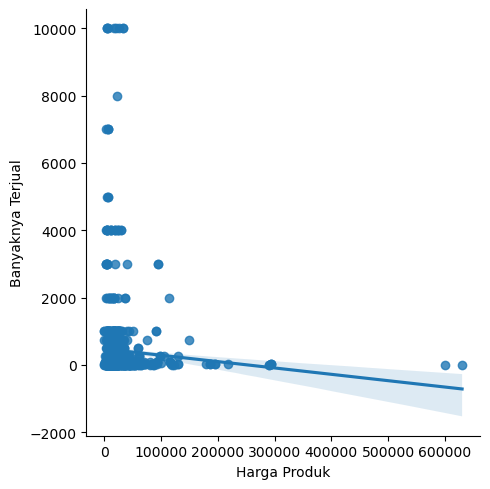

In [745]:
import scipy
sns.lmplot(data=data_seblak, x='Harga Produk', y='Banyaknya Terjual')

terlihat banyaknya terjual produk seblak dengan harga yang murah

In [759]:
# Mengganti nilai inf dengan NaN
data_seblak.replace([np.inf, -np.inf], np.nan, inplace=True)

# Menghapus baris yang mengandung NaN
data_seblak.dropna(subset=['Harga Produk', 'Banyaknya Terjual'], inplace=True)

In [760]:
corr_r, pval_p = stats.pearsonr(data_seblak['Harga Produk'], data_seblak['Banyaknya Terjual'])       # Pearson (r)
corr_rho, pval_s = stats.spearmanr(data_seblak['Harga Produk'], data_seblak['Banyaknya Terjual'])    # Spearman (rho)
corr_tau, pval_k = stats.kendalltau(data_seblak['Harga Produk'], data_seblak['Banyaknya Terjual'])   # Kendall (tau)

print(f"r-correlation  : {corr_r:.2f}, p-value: {pval_p}")      # Pearson (r)
print(f"rho-correlation: {corr_rho:.2f}, p-value: {pval_s}")    # Spearman (rho)
print(f"tau-correlation: {corr_tau:.2f}, p-value: {pval_k}")    # Kendall (tau)

r-correlation  : -0.06, p-value: 0.0416090283115543
rho-correlation: -0.08, p-value: 0.009110537598767782
tau-correlation: -0.05, p-value: 0.008890134309072418


Korelasi Negatif: Nilai koefisien korelasi untuk ketiga metode menunjukkan nilai negatif (sekitar -0.08). Ini berarti ada kecenderungan bahwa semakin tinggi harga produk, semakin sedikit jumlah yang terjual. Namun, korelasi ini tergolong lemah.

# Conclusion

1. Analisis Distribusi Harga, Banyaknya Produk Terjual, dan Rating:

Kesimpulan: Harga Menengah: Produk seblak memiliki harga yang wajar dan menargetkan pasar menengah ke atas, yang dapat membantu menarik segmen konsumen yang lebih luas.
Permintaan Tinggi: Dengan jumlah produk terjual yang tinggi, produk seblak menunjukkan minat pasar yang kuat, menjadikannya kandidat yang potensial untuk dipertimbangkan dalam model bisnis dropship.
Kepuasan Pelanggan: Rating yang sangat tinggi menunjukkan bahwa produk seblak diterima dengan baik oleh pelanggan, yang mendukung keputusan untuk menjual produk ini dengan kepercayaan bahwa kualitasnya akan menarik pembeli.

2. Potensi Pendapatan:

Kesimpulan: Berdasarkan analisis dengan interval confidence level 95%, estimasi pendapatan bulanan dari penjualan produk seblak diperkirakan berada di antara Rp6.243.117,59 dan Rp9.251.056,36. Dengan tingkat keyakinan 95%, pendapatan dari penjualan produk seblak kemungkinan besar akan berada dalam rentang tersebut.

3. Perbedaan Harga di Jabodetabek dan Luar Jabodetabek:
Kesimpulan: Berdasarkan analisis, harga rata-rata seblak di Jabodetabek lebih tinggi dibandingkan dengan harga seblak di luar Jabodetabek.

Hipotesis Nol (H0): Tidak ada perbedaan signifikan dalam rata-rata harga produk antara Jabodetabek dan luar Jabodetabek.
Hipotesis Alternatif (H1): Ada perbedaan signifikan dalam rata-rata harga produk antara Jabodetabek dan luar Jabodetabek.
Hasil analisis mendukung H1, yang menunjukkan bahwa rata-rata harga seblak di Jabodetabek berbeda secara signifikan dibandingkan dengan luar Jabodetabek.

4. Preferensi Pelanggan terhadap Harga Produk:

Kesimpulan: Meskipun korelasi antara harga dan jumlah terjual lemah, semua uji menunjukkan hubungan yang signifikan secara statistik. Ini berarti bahwa ada kecenderungan nyata, meskipun kecil, di mana produk dengan harga lebih tinggi cenderung terjual dalam jumlah yang lebih sedikit.

Kesimpulan Umum:

Dari hasil analisis ini, dapat disimpulkan bahwa produk seblak memiliki potensi yang baik untuk dijual melalui skema dropship di Tokopedia. Seblak dengan harga sekitar Rp29.416 cenderung disukai oleh konsumen, baik dari segi jumlah penjualan maupun rating. Namun, perhatian khusus harus diberikan pada strategi penetapan harga, terutama di wilayah Jabodetabek yang menunjukkan harga lebih tinggi. Selain itu, strategi promosi yang berfokus pada harga kompetitif bisa menjadi kunci untuk meningkatkan penjualan, mengingat kecenderungan konsumen yang lebih memilih produk dengan harga lebih rendah. Dengan demikian, bisnis dropship seblak dapat menjadi usaha yang menguntungkan jika dikelola dengan baik.